<a href="https://colab.research.google.com/github/wddonovan/SEF-Microgrid-XGBoost-Multivariate-Forecasting/blob/master/myXGBoostsolarForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(365, 12)
Index(['Generation', 'Year', 'Month', 'Day', 'Hour', 'Precipitation Intensity',
       'Precipitation Probability', 'Dew Point', 'Highest Temp', 'Lowest Temp',
       'Humidity', 'UV Index'],
      dtype='object')
    Generation  Year  Month  Day  ...  Highest Temp  Lowest Temp  Humidity  UV Index
0    56.082903  2019      8   13  ...         92.55        60.99      0.48        10
1    59.010374  2019      8   12  ...         89.58        56.72      0.49         9
2    58.256475  2019      8   11  ...         83.96        57.59      0.60         9
3    45.436425  2019      8   10  ...         75.34        56.44      0.75         8
4    59.709612  2019      8    9  ...         78.06        59.13      0.63         9
5    56.565028  2019      8    8  ...         76.73        55.51      0.70         9
6    57.045537  2019      8    7  ...         80.15        51.77      0.71        10
7    47.921094  2019      8    6  ...         85.67        53.48      0.67        10
8    53.874

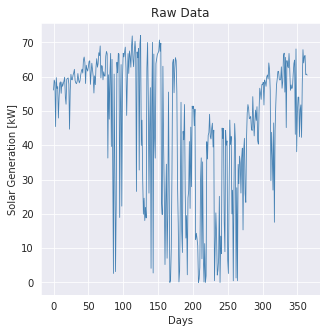

In [0]:
from pandas import read_csv
from pandas import Series
from datetime import datetime
import pandas as pd
import numpy as np
from matplotlib import pyplot
import xgboost as xgb
from xgboost import plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.patches as mpatches

#Code builds upon work by Rob Mulla and Hompi Hump on Kaggle
#tutorials can be found at
#https://www.kaggle.com/robikscube/tutorial-time-series-forecasting-with-xgboost
#https://www.kaggle.com/furiousx7/xgboost-time-series

#upload data from local CSV
#Data must have variable to predict in first column
#other variables may be in any order
data = pd.read_csv('agShedML.csv', header=0)
print(data.shape)
print(data.columns)
# display first few rows
print(data.head(20))
# plot data
pyplot.title('Raw Data')
pyplot.xlabel('Days')
pyplot.ylabel('Solar Generation [kW]')
pyplot.plot(data.iloc[:,0],'steelblue',linewidth=0.8)
pyplot.show()

In [0]:
#seperate into predictor and target variables
x, y = data.iloc[:,1:], data.iloc[:,0]
#split data set into split and validation set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=105)
#define XGBoost Model as regressor
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.09,
                max_depth = 10, alpha = 10, n_estimators = 45) #changed nestimators from 10 and max_depth from 10

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE against test data: 9.948453


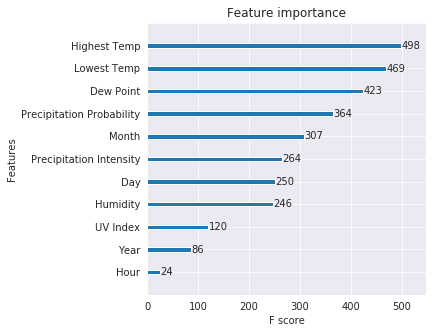

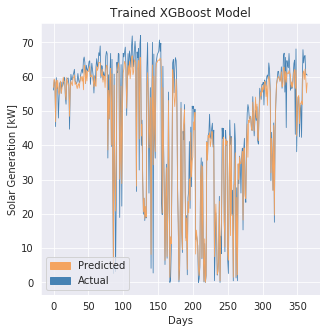

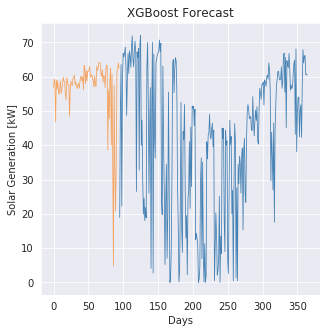

In [0]:
#train the model
xg_model.fit(x_train,y_train)
#predict values on test data set
predictions = xg_model.predict(x_test)
#calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE against test data: %f" % (rmse))
#plot importance of features and validation RMSE
xgb.plot_importance(xg_model)
pyplot.rcParams['figure.figsize'] = [5, 5]
pyplot.savefig('solarImp.png')
pyplot.show()


#forecast values using training data set
forecast=xg_model.predict(data.iloc[:,1:])
# plot data
sns.set_style("darkgrid")
#create Proxy artists to add legend
red_patch = mpatches.Patch(color='sandybrown', label='Predicted')
blue_patch = mpatches.Patch(color='steelblue', label='Actual')
pyplot.legend(handles=[red_patch,blue_patch])
#label and show graph
#sns.set_style("darkgrid")
pyplot.title('Trained XGBoost Model')
pyplot.xlabel('Days')
pyplot.ylabel('Solar Generation [kW]')
pyplot.plot(data.iloc[:,0],'steelblue',linewidth=0.8)
pyplot.plot(forecast,'sandybrown',linewidth=0.8)
pyplot.savefig('solarXGB.png')
pyplot.show()

#alternate plot for visualization purposes
start_val = forecast.size
start_val = start_val - 270
fore1=forecast[:start_val]
pyplot.title('XGBoost Forecast')
pyplot.xlabel('Days')
pyplot.ylabel('Solar Generation [kW]')
pyplot.plot(data.iloc[start_val:,0],'steelblue',linewidth=0.8)
pyplot.plot(fore1,'sandybrown',linewidth=0.8)
pyplot.savefig('solarForecast.png')
pyplot.show()


In [0]:
#k-fold Cross Validation Method
data_dmatrix = xgb.DMatrix(data=x,label=y)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()
finalRMSE=(cv_results["test-rmse-mean"]).tail(1)
print(finalRMSE)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


49    11.441548
Name: test-rmse-mean, dtype: float64


(365, 12)
Index(['Usage', 'Year', 'Month', 'Day', 'Hour', 'Precipitation Intensity',
       'Precipitation Probability', 'Dew Point', 'Highest Temp', 'Lowest Temp',
       'Humidity', 'UV Index'],
      dtype='object')
       Usage  Year  Month  Day  ...  Highest Temp  Lowest Temp  Humidity  UV Index
0   7.128378  2019      8   13  ...         92.55        60.99      0.48        10
1   6.988642  2019      8   12  ...         89.58        56.72      0.49         9
2   7.169014  2019      8   11  ...         83.96        57.59      0.60         9
3   6.954790  2019      8   10  ...         75.34        56.44      0.75         8
4   6.972340  2019      8    9  ...         78.06        59.13      0.63         9
5   7.663004  2019      8    8  ...         76.73        55.51      0.70         9
6   7.116831  2019      8    7  ...         80.15        51.77      0.71        10
7   7.198780  2019      8    6  ...         85.67        53.48      0.67        10
8   7.068232  2019      8    5  ..

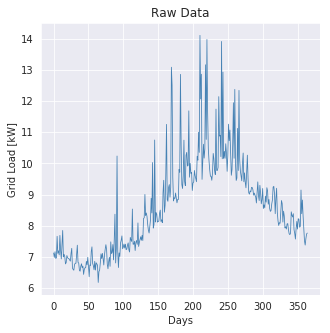

In [0]:
#upload data from local CSV
#Data must have variable to predict in first column
#other variables may be in any order
data = pd.read_csv('usageML.csv', header=0)
print(data.shape)
print(data.columns)
# display first few rows
print(data.head(20))
# plot data
pyplot.title('Raw Data')
pyplot.xlabel('Days')
pyplot.ylabel('Grid Load [kW]')
pyplot.plot(data.iloc[:,0],'steelblue',linewidth=0.8)
pyplot.show()

In [0]:
#seperate into predictor and target variables
x2, y2 = data.iloc[:,1:], data.iloc[:,0]
#split data set into split and validation set
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=105)
#define XGBoost Model as regressor
xg_load = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.09,
                max_depth = 10, alpha = 10, n_estimators = 45) #changed nestimators from 10 and max_depth from 10

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


RMSE against test data: 0.754986


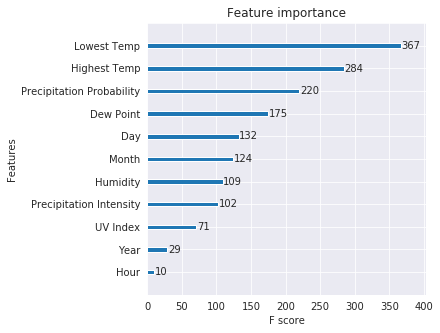

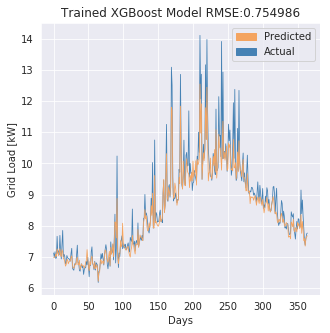

In [0]:
#train the model
xg_load.fit(x_train2,y_train2)
#predict values on test data set
predictions2 = xg_load.predict(x_test2)
#calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test2, predictions2))
print("RMSE against test data: %f" % (rmse))
#plot importance of features and validation RMSE
xgb.plot_importance(xg_load)
pyplot.rcParams['figure.figsize'] = [5, 5]
pyplot.show()


#forecast values using training data set
forecast2=xg_load.predict(data.iloc[:,1:])
# plot data
sns.set_style("darkgrid")
pyplot.title('Trained XGBoost Model RMSE:%f'%(rmse))
pyplot.xlabel('Days')
pyplot.ylabel('Grid Load [kW]')
#create Proxy artists to add legend
red_patch = mpatches.Patch(color='sandybrown', label='Predicted')
blue_patch = mpatches.Patch(color='steelblue', label='Actual')
pyplot.legend(handles=[red_patch,blue_patch])
pyplot.plot(data.iloc[:,0],'steelblue',linewidth=0.8)
pyplot.plot(forecast2,'sandybrown',linewidth=0.8)
pyplot.savefig('loadForecast.png')
pyplot.show()